## Importing Libraries And Calling Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm, stats

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./Data/forestfires.csv')

data = df.copy()

In [759]:
'''
X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84
'''

"\nX - x-axis spatial coordinate within the Montesinho park map: 1 to 9\n\nY - y-axis spatial coordinate within the Montesinho park map: 2 to 9\n\nmonth - month of the year: 'jan' to 'dec'\n\nday - day of the week: 'mon' to 'sun'\n\nFFMC - FFMC index from the FWI system: 18.7 to 96.20\n\nDMC - DMC index from the FWI system: 1.1 to 291.3\n\nDC - DC index from the FWI system: 7.9 to 860.6\n\nISI - ISI index from the FWI system: 0.0 to 56.10\n\ntemp - temperature in Celsius degrees: 2.2 to 33.30\n\nRH - relative humidity in %: 15.0 to 100\n\nwind - wind speed in km/h: 0.40 to 9.40\n\nrain - outside rain in mm/m2 : 0.0 to 6.4\n\narea - the burned area of the forest (in ha): 0.00 to 1090.84\n"

In [760]:
season = []

def season_func(month):
    
    i = month
    if i == 'dec' or i == 'jan' or i == 'feb':
        season.append('winter')
    elif i == 'mar' or i == 'apr' or i == 'may':
        season.append('spring')
    elif i == 'jun' or i == 'jul' or i == 'aug':
        season.append('summer')
    else:
        'sep-oct-nov'
        season.append('autumn')

data['seasons'] = data['month'].apply(season_func)

mont = {
        'dec': 'winter',
        'jan': 'winter',
        'feb': 'winter',
        'mar': 'spring',
        'apr': 'spring',
        'may': 'spring',
        'jun': 'summer',
        'jul': 'summer',
        'aug': 'summer',
        'sep': 'autumn',
        'oct': 'autumn',
        'nov': 'autumn'
    }
data['seasons'] = data.month.map(mont)

data.day.replace(
    ('mon','tue','wed','thu','fri','sat','sun'),
    (1,2,3,4,5,6,7), 
    inplace=True
)

data.seasons.replace(
    ('winter', 'spring', 'summer', 'autumn'),
    (1, 2, 3, 4), inplace=True
)

In [761]:
def damage(area):

    if area == 0.0:
        return 'no-damage'
    else:
        return 'damage'

data['damage'] = data['area'].apply(damage)

data['damage'].replace(
    {'damage':1, 'no-damage':0},
    inplace=True
)

In [762]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
0,7,5,mar,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,2,0
1,7,4,oct,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,4,0
2,7,4,oct,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,4,0
3,8,6,mar,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,2,0
4,8,6,mar,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,2,0


In [763]:
n_row, n_col = data.shape

print(f'total number of rows is {n_row}, total number of columns is {n_col}')

total number of rows is 517, total number of columns is 15


In [764]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        517 non-null    int64  
 1   Y        517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    int64  
 4   FFMC     517 non-null    float64
 5   DMC      517 non-null    float64
 6   DC       517 non-null    float64
 7   ISI      517 non-null    float64
 8   temp     517 non-null    float64
 9   RH       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
 13  seasons  517 non-null    int64  
 14  damage   517 non-null    int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 60.7+ KB


In [765]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40


<Axes: >

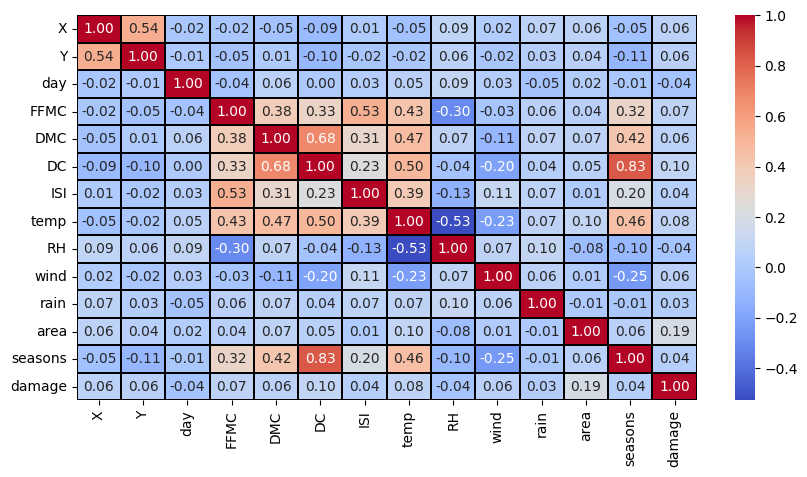

In [766]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    annot=True,
    data=data.corr(), 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.01, linecolor='black'
)

In [767]:
data.corr()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
X,1.000000,0.539548,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,-0.053253,0.062491
Y,0.539548,1.000000,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,-0.108493,0.056892
day,-0.024922,-0.005453,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,-0.010834,-0.042970
FFMC,-0.021039,-0.046308,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.322135,0.073823
DMC,-0.048384,0.007782,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.419594,0.062672
DC,-0.085916,-0.101178,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.827460,0.096724
ISI,0.006210,-0.024488,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.195651,0.035663
temp,-0.051258,-0.024103,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.456244,0.076047
RH,0.085223,0.062221,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.102636,-0.035587
wind,0.018798,-0.020341,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.245033,0.055702


In [768]:
#! Which months are more likely forest fires ?
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [769]:
data[data['area'] > data.area.std()].sort_values(by='area', ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
238,6,5,sep,6,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,4,1
415,8,6,aug,4,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,3,1
479,7,4,jul,1,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,3,1
237,1,2,sep,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,4,1
236,2,2,sep,6,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,4,1
235,8,6,aug,7,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,3,1
420,8,8,aug,3,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,3,1
377,2,2,aug,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,3,1
234,4,5,sep,6,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88,4,1
233,9,4,sep,2,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66,4,1


In [770]:
data[(data['area'] > 0) & (data['month'] == 'aug')].agg(['mean', 'max', 'min'])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
mean,4.606061,4.414141,NaN,4.383838,92.676768,151.541414,638.174747,11.783838,22.39798,44.252525,4.138384,0.078788,23.21202,3.0,1.0
max,9.000000,8.000000,aug,7.000000,96.200000,273.800000,819.100000,22.700000,33.30000,96.000000,8.900000,6.400000,746.28000,3.0,1.0
min,1.000000,2.000000,aug,1.000000,81.600000,56.700000,480.800000,1.900000,5.10000,22.000000,0.400000,0.000000,0.09000,3.0,1.0


In [771]:
data[(data['area'] > 0) & (data['month'] == 'sep')].agg(['mean', 'max', 'min'])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
mean,4.309278,4.185567,NaN,4.164948,91.217526,123.590722,739.670103,8.313402,19.624742,42.494845,3.574227,0.0,31.815773,4.0,1.0
max,9.000000,6.000000,sep,7.000000,94.300000,291.300000,860.600000,17.900000,29.600000,78.000000,7.600000,0.0,1090.840000,4.0,1.0
min,1.000000,2.000000,sep,1.000000,63.500000,53.300000,665.300000,0.800000,10.100000,15.000000,0.900000,0.0,0.330000,4.0,1.0


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

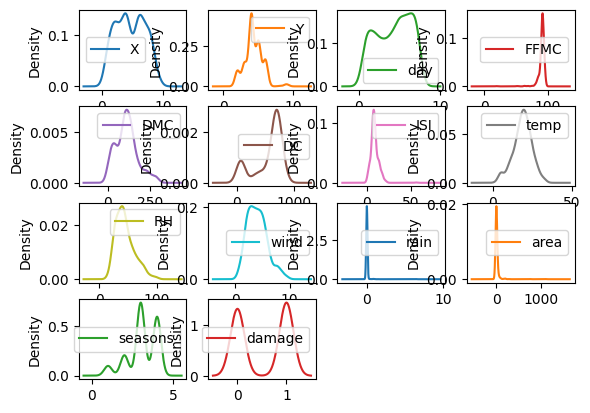

In [772]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

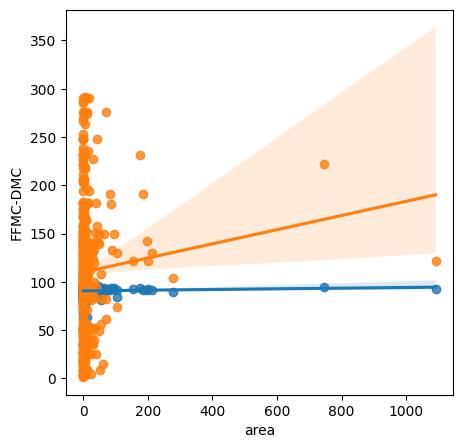

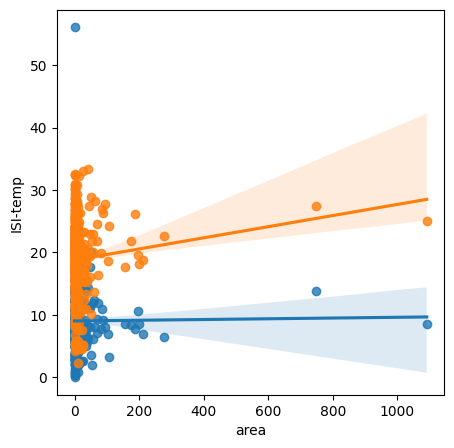

Text(0, 0.5, 'damage-seasons')

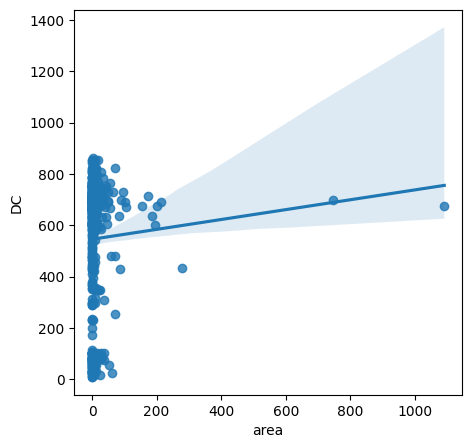

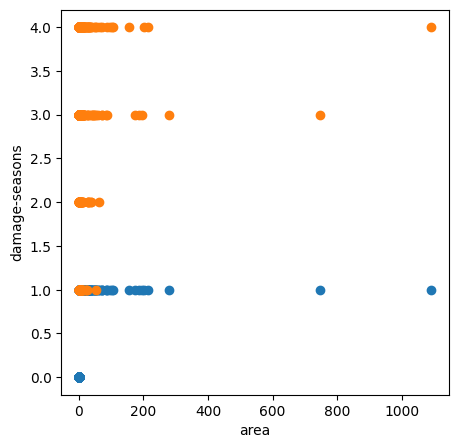

In [773]:
area = data['area']

plt.figure(figsize=(5, 5))
sns.regplot(x=area, y=data['FFMC'], label='FFMC')
sns.regplot(x=area, y=data['DMC'], label='DMC')
plt.ylabel('FFMC-DMC')
plt.show()

plt.figure(figsize=(5, 5))
sns.regplot(x=area, y=data['ISI'], label='ISI')
sns.regplot(x=area, y=data['temp'], label='temp')
plt.ylabel('ISI-temp')
plt.show()

plt.figure(figsize=(5, 5))
sns.regplot(x=area, y=data['DC'], label='DC')
plt.xlabel('area')
plt.ylabel('DC')

plt.figure(figsize=(5, 5))
plt.scatter(x=area, y=data['damage'], label='damage')
plt.scatter(x=area, y=data['seasons'], label='seasons')
plt.xlabel('area')
plt.ylabel('damage-seasons')

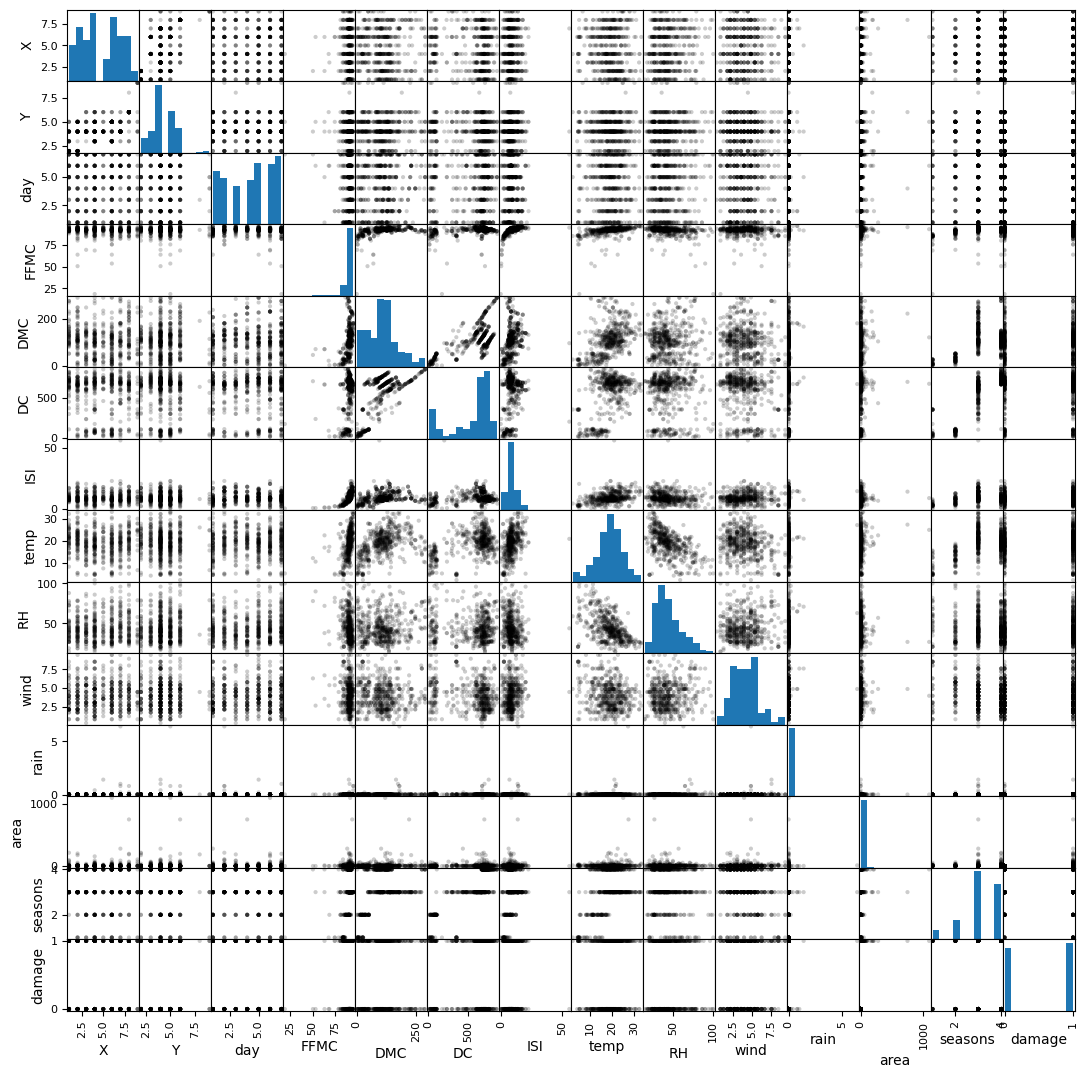

In [774]:
scatter_matrix(data, alpha=0.2, figsize=(13, 13), diagonal='hist', grid=True, color='black')
plt.show()

In [784]:
'''
As observed earlier, the variance (the spread of data points from the mean) 
turned out to be significantly high. As seen above, a large portion of the data 
falls within a small range, but a small portion has taken very high values.
'''

data['area'].var()

4052.063224823444

In [785]:
data.corr().area

X          0.063385
Y          0.044873
month      0.056496
day        0.023226
FFMC       0.040122
DMC        0.072994
DC         0.049383
ISI        0.008258
temp       0.097844
RH        -0.075519
wind       0.012317
rain      -0.007366
area       1.000000
seasons    0.056005
damage     0.193224
Name: area, dtype: float64

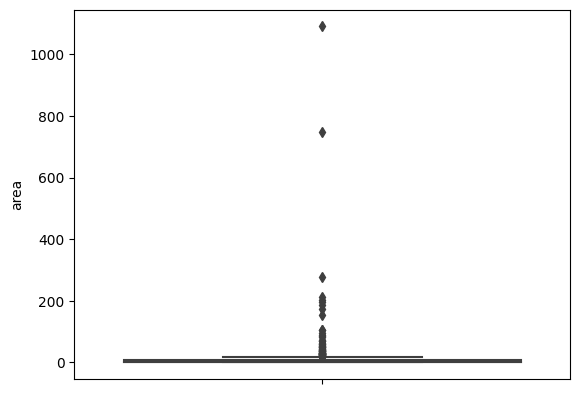

In [777]:
sns.boxplot(data=data, y=data.area)
plt.show()

In [786]:
z_scores = np.abs((data['area'] - data['area'].mean()) / data['area'].std())

outliers = data[z_scores > 3]
outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,seasons,damage
237,1,2,9,2,0.932903,0.442453,0.802979,0.124777,18.8,0.294118,2.2,0.0,212.88,4,1
238,6,5,9,6,0.952258,0.413508,0.781635,0.153298,25.1,0.141176,4.0,0.0,1090.84,4,1
415,8,6,8,4,0.981935,0.762578,0.810015,0.247772,27.5,0.141176,4.9,0.0,746.28,3,1
479,7,4,7,1,0.909677,0.354238,0.496892,0.114082,22.6,0.494118,4.9,0.0,278.53,3,1


* As seen above, there is a lot outlier values

## Preprocessing

In [787]:
data.month.replace(
    ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    inplace=True
)

In [788]:
minmax = MinMaxScaler()

data['FFMC'] = minmax.fit_transform(np.array(data['FFMC']).reshape(-1, 1))
data['DMC'] = minmax.fit_transform(np.array(data['DMC']).reshape(-1, 1))
data['DC'] = minmax.fit_transform(np.array(data['DC']).reshape(-1, 1))
data['ISI'] = minmax.fit_transform(np.array(data['ISI']).reshape(-1, 1))
data['RH'] = minmax.fit_transform(np.array(data['RH']).reshape(-1, 1))

In [789]:
y = data['area']
x = data.drop(columns='area', axis=1)

In [790]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [791]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Test On Machine Learning Algorithms

### Regression

In [792]:
import regression

(   
    models_output_list,
    highest_r2_output,
    highest_mse_output,
    highest_mae_output 
) = regression.regression.regression_models(x_train, x_test, y_train, y_test)

print(
    'highest_r2_output:',highest_r2_output,'\n' ,
    'highest_mae_output:',highest_mae_output,'\n' ,
    'highest_mse_output:',highest_mse_output
)

highest_r2_output: ['GradientBoostingRegressor', 0.053679561003499354] 
 highest_mae_output: ['SVR', 18.602726234107493] 
 highest_mse_output: ['GradientBoostingRegressor', 11155.00022485666]


In [793]:
from sklearn.svm import SVR

svr_model = SVR(
    kernel='rbf',
    gamma='auto',
    C=7
)

svr_model.fit(x_train, y_train)

y_pred_svr = svr_model.predict(x_test)

print(mean_absolute_error(y_test, y_pred_svr))
print(mean_squared_error(y_test, y_pred_svr))

18.49408003084051
11946.52884574024


In [794]:
from sklearn.neural_network import MLPRegressor

model_nn = MLPRegressor( 
    solver = 'sgd',
    activation = 'relu', 
    hidden_layer_sizes=(5,10),
    verbose = False, 
    max_iter=9999, 
    tol=1e-6, 
    alpha = 0.00001,
    random_state=42
)

model_nn.fit(x_train, y_train)

y_pred_nn = model_nn.predict(x_test)

mean_absolute_error(y_test, y_pred_nn)

22.784991425650453

* As seen above, despite trying multiple machine learning models and various preprocessing stages, I have been unable to achieve satisfactory results for the project.

* Hence, I attempted a classification task to predict whether the fire area would exceed 10 (danger) or remain below (no-danger). The goal was to categorize instances based on the fire area measurement and determine potential dangerous situations.

### Classification

In [795]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [796]:
data.area = data.area.apply(lambda i : 1 if i > 10 else 0)

In [797]:
y = data.damage
x = data.drop(columns=['damage', 'area'], axis=1)

In [798]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

ss = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [799]:
import classification

(
    models_output_list,
    highest_acs_output,
    highest_f1s_output,
    highest_prs_output,
    highest_rcs_output,
    highest_rocs_output
) = classification.classification.classification_models(
    x_train, x_test, y_train, y_test
)

In [800]:
highest_acs_output

['SVC', 0.6346153846153846]

In [592]:
highest_f1s_output

['SVC', 0.6885245901639344]

In [593]:
highest_prs_output

['SVC', 0.6086956521739131]

In [594]:
highest_rcs_output

['SVC', 0.7924528301886793]

In [801]:
highest_rocs_output

['SVC', 0.6315205327413984]

In [802]:
model_randomforest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=None,
    random_state=42
)

model_randomforest.fit(x_train, y_train)

y_pred_random = model_randomforest.predict(x_test)

print(accuracy_score(y_test, y_pred_random))
print(precision_score(y_test, y_pred_random))
print(f1_score(y_test, y_pred_random))
print(recall_score(y_test, y_pred_random))

0.6057692307692307
0.59375
0.6495726495726496
0.7169811320754716


In [ ]:
'''
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
'''

param = [
    {
        'n_estimators' : [100, 50, 200],
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth' : [None, 5, 10, 20],
        'min_samples_split' : [2, 5, 10],
        'min_samples_leaf' : [1, 2, 4],
        'max_features' : ['sqrt', 'log2', None],
        'max_samples' : [None, 0.5, 0.8]
    }
]

grid = GridSearchCV(
    estimator=model_randomforest, param_grid=param, cv=10, n_jobs=-1
)

grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)


In [804]:
model_mlpc = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    solver='sgd',
    random_state=42
)

{'activation': 'tanh', 'learning_rate': 'adaptive', 'solver': 'sgd'}
model_mlpc.fit(x_train, y_train)

y_pred_mlpc = model_mlpc.predict(x_test)

print(accuracy_score(y_test, y_pred_mlpc))
print(precision_score(y_test, y_pred_mlpc))
print(f1_score(y_test, y_pred_mlpc))
print(recall_score(y_test, y_pred_mlpc))

0.6057692307692307
0.581081081081081
0.6771653543307086
0.8113207547169812


In [ ]:

param = [
    {
        'hidden_layer_sizes' : [(50, ), (100, ), (150, )],
        'activation' : ['relu', 'tanh', 'logistic'],
        'learning_rate' : ['adaptive', 0.001, 0.01, 0.1],
        'max_iter' : [100, 200, 500]
    }
]

grid = GridSearchCV(
    estimator=model_mlpc, param_grid=param, cv=10, n_jobs=-1
)

grid.fit(x_train, y_train)


print(grid.best_params_)
print(grid.best_score_)


In [805]:
model_svc = SVC(
    C=5,
    kernel='rbf',
    degree=2,
    gamma='scale',
)

model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_test)

print(accuracy_score(y_test, y_pred_svc))
print(precision_score(y_test, y_pred_svc))
print(f1_score(y_test, y_pred_svc))
print(recall_score(y_test, y_pred_svc))

0.6538461538461539
0.6440677966101694
0.6785714285714285
0.7169811320754716


In [735]:

param = [
    {
        'C' : [1, 2, 3, 5, 6, 7],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree' : [2, 3, 4, 5],
        'gamma' : ['scale', 'auto'],
        'shrinking' : [True, False],
        'class_weight' : [None, 'balanced']
    }
]

grid = GridSearchCV(
    estimator=model_svc, param_grid=param, cv=15, n_jobs=-1
)

grid.fit(x_train, y_train)

grid.best_params_


{'C': 5,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True}

In [808]:
y_pred = pd.DataFrame()

y_pred['SVC Prediction'] = y_pred_svc
y_pred['DecisionTreeClassifier Prediction'] = y_pred_mlpc
y_pred['RandomForestClassifier Prediction'] = y_pred_random

"""
    Enter a row of data from x_test to see all predictions
"""

row = int(input('Please etner a row from x_test:'))

counter_1 = 0
counter_0 = 0
for i in range(3):

    if y_pred[ row : row+1 ].values[0][i] == 1:
        counter_1 += 1
    elif y_pred[ row : row+1 ].values[0][i] == 0:
        counter_0 +=1

print(f'Total number of no-damage is {counter_0} \nTotal number of damae is {counter_1}')

if counter_1 > counter_0:
    print('the fire is more likely to have major damage')
else:
    print('the fire is more likely to have minor damage')


Total number of no-damage is 2 
Total number of damae is 1
the fire is more likely to have minor damage
